c:\Users\LWG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[8869,    0],
       [ 862,    1]], dtype=int64)

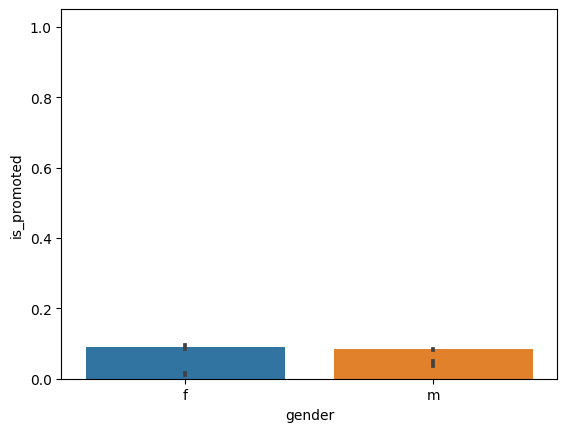

In [5]:
#출처 : https://coding-yesung.tistory.com/207
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hr_df = pd.read_csv('./hr.csv')
hr_df.head()

sns.barplot(x='previous_year_rating', y='is_promoted', data=hr_df)
sns.lineplot(x='avg_training_score', y='is_promoted', data=hr_df)
sns.barplot(x='gender', y='is_promoted', data=hr_df)

hr_df = hr_df.dropna() 
hr_df = pd.get_dummies(hr_df, columns=['department', 'region','education','gender','recruitment_channel'])
hr_df.head()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hr_df.drop('is_promoted', axis=1), hr_df['is_promoted'], test_size=0.2, random_state=10)

# 모델 불러오기
from sklearn.linear_model import LogisticRegression

# 모델 객체 생성
lr = LogisticRegression()
# 학습
lr.fit(X_train, y_train)
# 예측
pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)


In [ ]:
#비용함수 코드
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()